# 원, 삼각형, 사각형 구분하기 Ver.1
- 쉬운 문제를 이미지 부풀리기 없이 해결

In [1]:
from google.colab import files
up = files.upload()

Saving handwriting_shape.zip to handwriting_shape.zip


In [2]:
# Shell Escape, 개발도구에서 Shell 명령어를 사용할 때
!unzip handwriting_shape.zip -d handwriting

Archive:  handwriting_shape.zip
   creating: handwriting/handwriting_shape/test/
   creating: handwriting/handwriting_shape/test/circle/
  inflating: handwriting/handwriting_shape/test/circle/circle016.png  
  inflating: handwriting/handwriting_shape/test/circle/circle017.png  
  inflating: handwriting/handwriting_shape/test/circle/circle018.png  
  inflating: handwriting/handwriting_shape/test/circle/circle019.png  
  inflating: handwriting/handwriting_shape/test/circle/circle020.png  
   creating: handwriting/handwriting_shape/test/rectangle/
  inflating: handwriting/handwriting_shape/test/rectangle/rectangle016.png  
  inflating: handwriting/handwriting_shape/test/rectangle/rectangle017.png  
  inflating: handwriting/handwriting_shape/test/rectangle/rectangle018.png  
  inflating: handwriting/handwriting_shape/test/rectangle/rectangle019.png  
  inflating: handwriting/handwriting_shape/test/rectangle/rectangle020.png  
   creating: handwriting/handwriting_shape/test/triangle/
  infl

In [3]:
# 화면에 출력되는 내용과 에러 메시지를 쓰레기통 파일(/dev/null)로 보냄, 즉, 버림
!unzip handwriting_shape.zip -d . > /dev/null 2>&1

In [4]:
# 어떤 파일이 있는지 확인
! ls -l

total 268
drwxr-xr-x 3 root root   4096 Jan 14 01:35 handwriting
drwxr-xr-x 4 root root   4096 Jan 14 01:43 handwriting_shape
-rw-r--r-- 1 root root 259615 Jan 14 01:31 handwriting_shape.zip
drwxr-xr-x 1 root root   4096 Jan  9 14:36 sample_data


In [7]:
from PIL import Image
import matplotlib.pyplot as plt

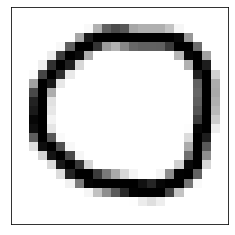

In [9]:
filename = 'handwriting_shape/train/circle/circle001.png'
img = Image.open(filename)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
from glob import glob
glob('handwriting_shape/train/circle/*.png')

['handwriting_shape/train/circle/circle012.png',
 'handwriting_shape/train/circle/circle014.png',
 'handwriting_shape/train/circle/circle005.png',
 'handwriting_shape/train/circle/circle006.png',
 'handwriting_shape/train/circle/circle008.png',
 'handwriting_shape/train/circle/circle011.png',
 'handwriting_shape/train/circle/circle002.png',
 'handwriting_shape/train/circle/circle013.png',
 'handwriting_shape/train/circle/circle001.png',
 'handwriting_shape/train/circle/circle004.png',
 'handwriting_shape/train/circle/circle009.png',
 'handwriting_shape/train/circle/circle003.png',
 'handwriting_shape/train/circle/circle015.png',
 'handwriting_shape/train/circle/circle010.png',
 'handwriting_shape/train/circle/circle007.png']

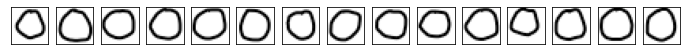

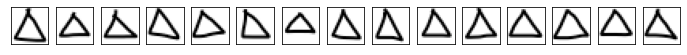

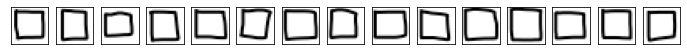

In [12]:
# Train dataset
shapes = ['circle', 'triangle', 'rectangle']
for shape in shapes:
    dir_name = f'handwriting_shape/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1, 15, i+1)
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

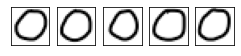

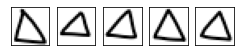

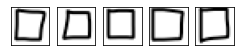

In [13]:
# Test dataset
shapes = ['circle', 'triangle', 'rectangle']
for shape in shapes:
    dir_name = f'handwriting_shape/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

- OpenCV 로 읽는 경우

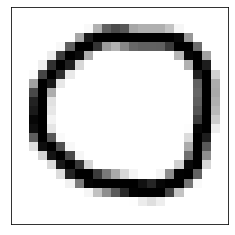

In [14]:
import cv2
img = cv2.imread(filename)[:,:,::-1]    # BGR color로 읽으니까 RGB로 바꿔줘야 함
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
img.shape

(24, 24, 3)

- 데이터셋 생성

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'handwriting_shape/train', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [17]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [18]:
train_data_generator.filenames[0]

'circle/circle001.png'

In [24]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'handwriting_shape/test', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


- 모델 정의/설정/학습/평가

In [19]:
import numpy as np
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [21]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [22]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [25]:
model.fit(
    train_data_generator,       # X, y
    steps_per_epoch=15,         # 총 데이터수 / batch_size, 45 / 3 ==> 15
    epochs=50,
    validation_data=test_data_generator,
    validation_steps=5          # 총 테스트 데이터수 / batch_size
)

Epoch 1/50
15/15 [==============================] - 1s 31ms/step - loss: 0.9329 - accuracy: 0.7111 - val_loss: 0.4702 - val_accuracy: 0.8000
Epoch 2/50
15/15 [==============================] - 0s 20ms/step - loss: 0.1003 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 1.7858e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 17ms/step - loss: 1.7469e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 18ms/step - loss: 1.4273e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
E

In [26]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 9ms/step - loss: 7.9425e-04 - accuracy: 1.0000


[0.0007942462689243257, 1.0]